# Default Setting

Executed in Colab pro environment.

* ML Framework
   - Python 3.7.10
   - Tensorflow 2.5.0

* Hardware
   - RAM: 12.7G
   - CPU: Intel(R) Xeon(R) CPU @ 2.30GHz (1core)
   - GPU: Tesla P100-PCIE-16GB

# 0. import packages

In [7]:
# 빗썸 가상화폐 데이터 모듈
!pip install -q pybithumb

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 5.4 MB/s eta 0:00:00


In [8]:
!pip install tensorflow==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 24.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [9]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.1
    Uninstalling tensorflow-2.13.1:
      Successfully

In [10]:
!pip install scikeras[tensorflow]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 44.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0.post1
    Uninstalling tensorflow-2.15.0.post1:
      

In [40]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
import pybithumb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
from keras import losses
from tensorflow.keras.layers import InputLayer

# 2. Data Preprocessing

In [143]:
mydf = pd.read_csv("train_temper.csv")

In [15]:
mydf.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [16]:
mydf.shape

(23011, 11)

In [17]:
plt.rcParams["figure.figsize"] = (15,10)

Text(0.5, 1.0, 'ETH')

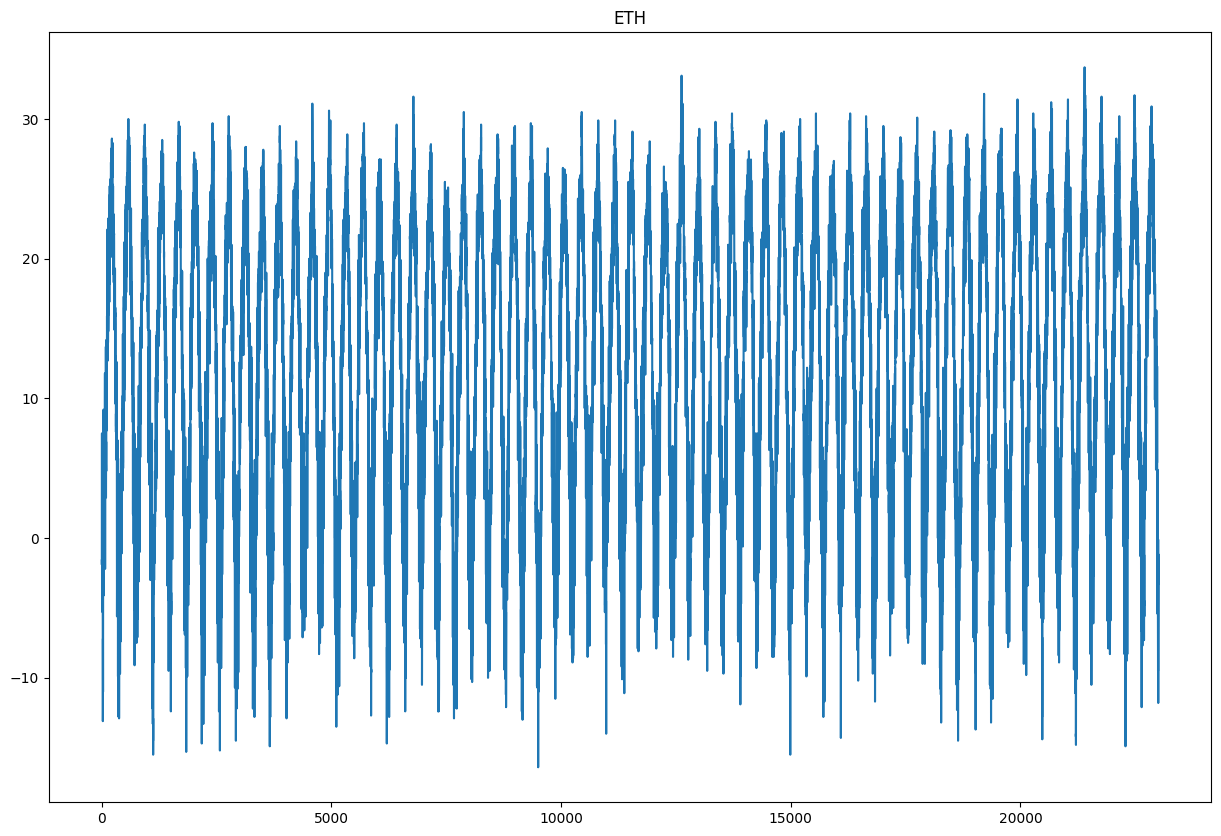

In [18]:
plt.plot(mydf['평균기온'])
plt.title('ETH')

In [19]:
def preprocess(series, window_size=None, scaling=True):

    if window_size!=None:
        series = series.rolling(window_size, min_periods=0).mean()
    array = np.array(series)

    if scaling==True:
        scaler = MinMaxScaler()
        training_data = scaler.fit_transform(array.reshape(-1,1))
    else:
        scaler = None

    return training_data, scaler

In [59]:
def make_dataset(training_data, t, h=0, test_size=0.9):

    X_train = []
    y_train = []
    for i in range(t//2+365, len(training_data)-h):
        X_train.append(training_data[i-t:i])
        y_train.append(training_data[i+h])
    X = np.array(X_train)
    y = np.array(y_train)

    # if test_size == 0 :
    #   return X, y

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=test_size, shuffle=False)


    return X_train,X_test,y_train,y_test

In [60]:
training_data, scaler = preprocess(mydf['평균기온'], window_size=5)

In [61]:
X_test,X_train,y_test,y_train = make_dataset(training_data, t = 30)

In [62]:
X_train.shape

(20368, 30, 1)

# MAE, MSE, RMSE

In [63]:
def MAE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.abs(y_true-y_pred)))

def MSE(y_true, y_pred):
    return "{:.2e}".format(np.mean(np.square(y_true-y_pred)))

def RMSE(y_true, y_pred):
    return "{:.2e}".format(np.sqrt(np.mean(np.square(y_true-y_pred))))

# GRU-adaboost FIT

In [64]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],1)))
model.add(GRU(units=128))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [65]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [67]:
# adaboost
GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=15, batch_size=32)
final_model = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

In [68]:
final_model.fit(X_train,y_train)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


637/637 [==============================] - 20s 28ms/step - loss: 0.0535
Epoch 2/15
637/637 [==============================] - 20s 31ms/step - loss: 0.0358
Epoch 3/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0287
Epoch 4/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0250
Epoch 5/15
637/637 [==============================] - 17s 27ms/step - loss: 0.0229
Epoch 6/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0212
Epoch 7/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0203
Epoch 8/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0198
Epoch 9/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0193
Epoch 10/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0192
Epoch 11/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0190
Epoch 12/15
637/637 [==============================] - 19s 29ms/step - loss: 0.0187
Epoch 13/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


637/637 [==============================] - 18s 28ms/step - loss: 0.0190
Epoch 2/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0191
Epoch 3/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0188
Epoch 4/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0188
Epoch 5/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0188
Epoch 6/15
637/637 [==============================] - 17s 27ms/step - loss: 0.0187
Epoch 7/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0187
Epoch 8/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0186
Epoch 9/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0184
Epoch 10/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0186
Epoch 11/15
637/637 [==============================] - 19s 29ms/step - loss: 0.0186
Epoch 12/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0186
Epoch 13/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


637/637 [==============================] - 18s 28ms/step - loss: 0.0199
Epoch 2/15
637/637 [==============================] - 19s 31ms/step - loss: 0.0198
Epoch 3/15
637/637 [==============================] - 20s 31ms/step - loss: 0.0197
Epoch 4/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0197
Epoch 5/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0199
Epoch 6/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0199
Epoch 7/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0197
Epoch 8/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0197
Epoch 9/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0197
Epoch 10/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0198
Epoch 11/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0196
Epoch 12/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0197
Epoch 13/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


637/637 [==============================] - 18s 28ms/step - loss: 0.0208
Epoch 2/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0207
Epoch 3/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0204
Epoch 4/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0205
Epoch 5/15
637/637 [==============================] - 22s 34ms/step - loss: 0.0206
Epoch 6/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0204
Epoch 7/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0206
Epoch 8/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0204
Epoch 9/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0206
Epoch 10/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0204
Epoch 11/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0204
Epoch 12/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0206
Epoch 13/15


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


637/637 [==============================] - 18s 28ms/step - loss: 0.0222
Epoch 2/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0223
Epoch 3/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0221
Epoch 4/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0220
Epoch 5/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0222
Epoch 6/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0219
Epoch 7/15
637/637 [==============================] - 18s 29ms/step - loss: 0.0221
Epoch 8/15
637/637 [==============================] - 19s 30ms/step - loss: 0.0219
Epoch 9/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0220
Epoch 10/15
637/637 [==============================] - 20s 32ms/step - loss: 0.0219
Epoch 11/15
637/637 [==============================] - 19s 29ms/step - loss: 0.0220
Epoch 12/15
637/637 [==============================] - 18s 28ms/step - loss: 0.0218
Epoch 13/15


AdaBoostRegressor(estimator=KerasRegressor(batch_size=32, build_fn=<function <lambda> at 0x7dfde0272c20>, epochs=15),
                  n_estimators=5, random_state=42)

In [69]:
preds = final_model.predict(X_test)
preds = scaler.inverse_transform(preds.reshape(-1,1))
preds_series = np.hstack([mydf['평균기온'][:-len(preds)], preds.squeeze(1)])

71/71 [==============================] - 1s 7ms/step


In [76]:
X_test.shape

(2263, 30, 1)

In [107]:
n = training_data[-30:]
n = np.array(n)

In [110]:
n = np.append(n,[1])
n = np.delete(n,-1)

In [147]:
result.shape

(358, 1)

In [125]:
result = np.array(result)
result = scaler.inverse_transform(result.reshape(-1,1))

In [153]:
s = pd.read_csv('sample_submission.csv', encoding = 'cp949', names = ['일시','평균기온'])
s['평균기온'][1:] = result.reshape(358)
s[['일시','평균기온']].to_csv("submission.csv", mode='w', index=False, encoding='utf-8')

In [ ]:
a = pd.read_csv('submission.csv')

In [ ]:
a

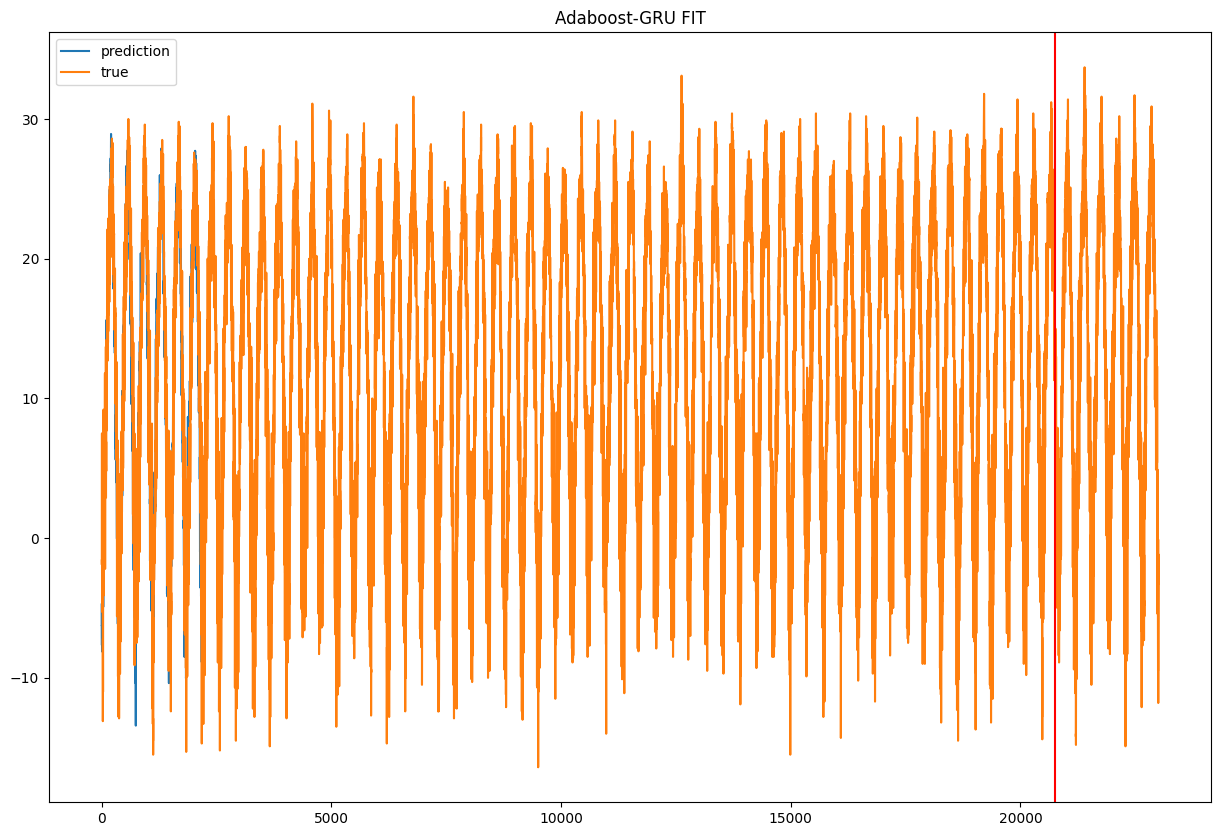

In [70]:
plt.plot(preds, label='prediction')
plt.plot(mydf['평균기온'], label='true')
plt.axvline(x=len(mydf['평균기온'])-len(preds), color='r')
plt.legend()
plt.title('Adaboost-GRU FIT')
plt.show()

In [71]:
y_true = mydf['평균기온'][-len(preds):]
y_pred = preds.squeeze(1)

In [72]:
print(MAE(y_true, y_pred))
print(MSE(y_true, y_pred))
print(RMSE(y_true, y_pred))

1.19e+01
1.86e+02
1.36e+01
